In [1]:
from forecasting_models.multivariate_models.lstm.model import MultivarLSTMForecastModel
from data_utils.csv_utils import read_timeseries_csv

2024-04-13 20:06:05.900723: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-13 20:06:05.901346: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 20:06:05.904472: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 20:06:05.952388: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-13 20:06:06.517468: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

<Axes: xlabel='timestamp'>

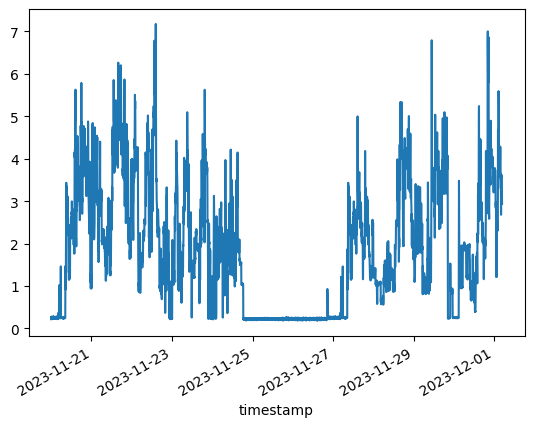

In [2]:
train_df = read_timeseries_csv("./examples/sample_data/multivar_data/multivar_example_5m_TRAIN.csv")
train_df["cpu_usage_percentage"].plot()

<Axes: xlabel='timestamp'>

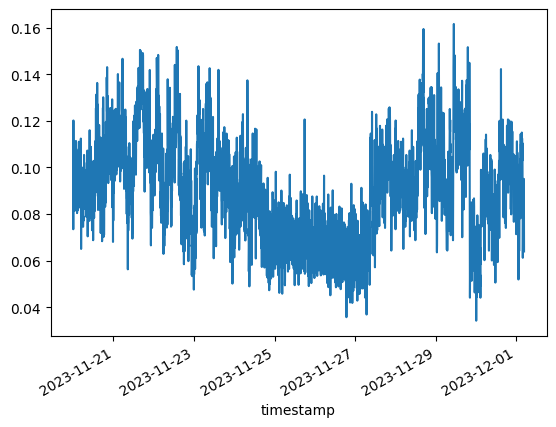

In [3]:
train_df["mem_usage_percentage"].plot()

array([[<Axes: title={'center': 'cpu_usage_percentage'}>,
        <Axes: title={'center': 'mem_usage_percentage'}>]], dtype=object)

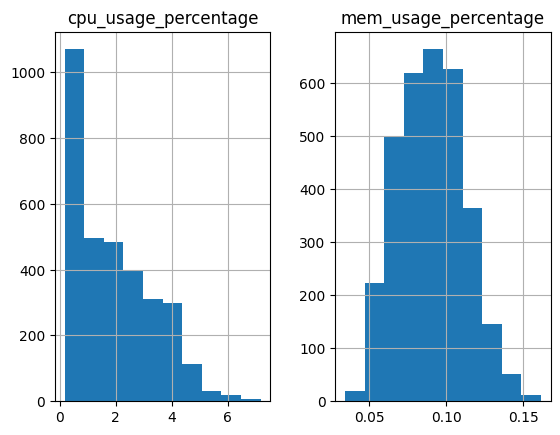

In [4]:
train_df.hist()

<Axes: xlabel='timestamp'>

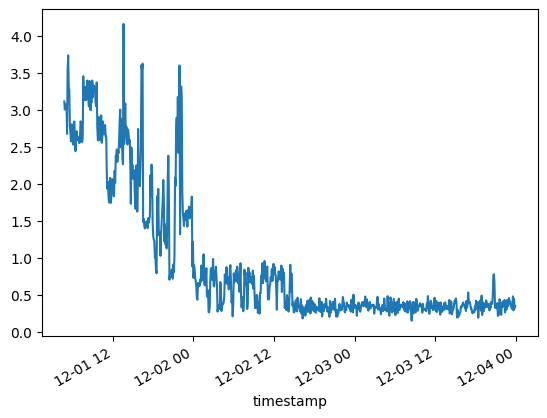

In [5]:
test_df = read_timeseries_csv("./examples/sample_data/multivar_data/multivar_example_5m_TEST.csv")
test_df["cpu_usage_percentage"].plot()

<Axes: xlabel='timestamp'>

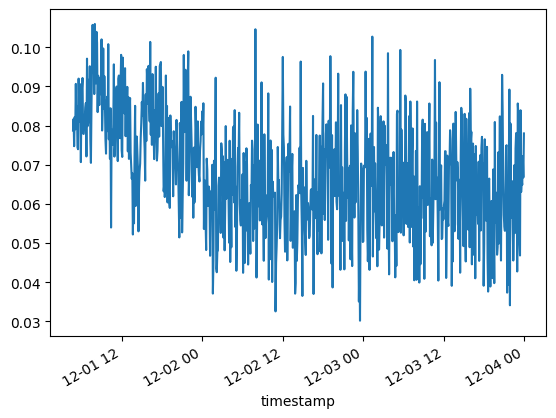

In [6]:
test_df["mem_usage_percentage"].plot()

array([[<Axes: title={'center': 'cpu_usage_percentage'}>,
        <Axes: title={'center': 'mem_usage_percentage'}>]], dtype=object)

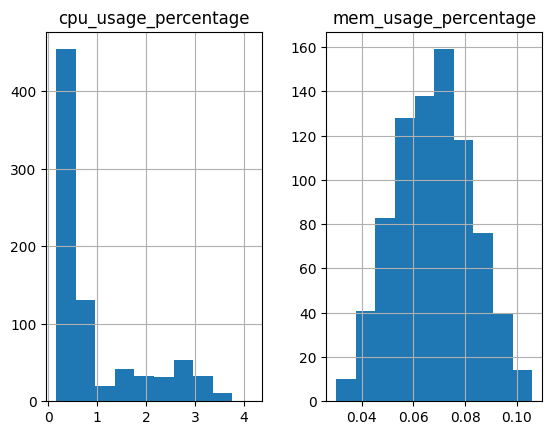

In [7]:
test_df.hist()

In [8]:
lstm = MultivarLSTMForecastModel("./examples/configs/multivar_lstm/multivar_lstm_config.yaml")

In [ ]:
lstm.train()

In [10]:
test_init_inputs_df = read_timeseries_csv(lstm.config.data_path)[lstm.config.variable_selection.input_variables][-lstm.config.forecasting_parameters.input_width:]

print(test_init_inputs_df.head(lstm.config.forecasting_parameters.input_width))

                     cpu_usage_percentage  mem_usage_percentage
timestamp                                                      
2023-12-01 03:45:22              4.088529              0.103091
2023-12-01 03:50:22              3.545235              0.083918
2023-12-01 03:55:22              3.442127              0.061200
2023-12-01 04:00:22              2.907451              0.067637
2023-12-01 04:05:22              2.680076              0.080101
2023-12-01 04:10:22              3.554933              0.088102
2023-12-01 04:15:22              3.627717              0.092182
2023-12-01 04:20:22              3.565279              0.071427
2023-12-01 04:25:22              3.584690              0.075333
2023-12-01 04:30:22              3.026067              0.095102
2023-12-01 04:35:22              3.229151              0.087424
2023-12-01 04:40:22              2.937589              0.063915


In [11]:
lstm.predict(
    test_init_inputs_df
)

,cpu_usage_percentage,mem_usage_percentage
2023-12-01 04:45:22,2.835424,0.095451
2023-12-01 04:50:22,2.780512,0.124424
2023-12-01 04:55:22,2.737921,0.107420
2023-12-01 05:00:22,2.811635,0.124670
2023-12-01 05:05:22,2.819265,0.114095
2023-12-01 05:10:22,2.798933,0.109287
2023-12-01 05:15:22,2.785832,0.103945
2023-12-01 05:20:22,2.825394,0.083924
2023-12-01 05:25:22,2.768261,0.101995
2023-12-01 05:30:22,2.821248,0.092711


In [12]:
test_df.head(lstm.config.forecasting_parameters.output_width)

,cpu_usage_percentage,mem_usage_percentage
timestamp,,
2023-12-01 04:45:22,3.113010,0.078752
2023-12-01 04:50:22,3.004385,0.081700
2023-12-01 04:55:22,3.075376,0.074745
2023-12-01 05:00:22,3.015011,0.082209
2023-12-01 05:05:22,3.048212,0.079055
2023-12-01 05:10:22,2.673476,0.090659
2023-12-01 05:15:22,3.545206,0.079945
2023-12-01 05:20:22,3.735257,0.084915
2023-12-01 05:25:22,3.307455,0.074416


In [13]:
metric_name = "cpu_usage_percentage"

eval_pred_val, eval_pred_df = lstm.evaluate_prediction(
    target_col_name=metric_name,
    test_series=test_df[metric_name][:lstm.config.forecasting_parameters.output_width],
    method="mae",
)

print(eval_pred_val)
eval_pred_df.head(lstm.config.forecasting_parameters.output_width)

0.3484222653282416


,actual,predicted,diff
2023-12-01 04:45:22,3.113010,2.835424,0.277586
2023-12-01 04:50:22,3.004385,2.780512,0.223873
2023-12-01 04:55:22,3.075376,2.737921,0.337455
2023-12-01 05:00:22,3.015011,2.811635,0.203375
2023-12-01 05:05:22,3.048212,2.819265,0.228947
2023-12-01 05:10:22,2.673476,2.798933,-0.125457
2023-12-01 05:15:22,3.545206,2.785832,0.759374
2023-12-01 05:20:22,3.735257,2.825394,0.909863
2023-12-01 05:25:22,3.307455,2.768261,0.539195
2023-12-01 05:30:22,3.271119,2.821248,0.449871


In [14]:
test_result_df = lstm.test(
    read_timeseries_csv("./examples/sample_data/multivar_data/multivar_example_5m_TEST.csv"),
    init_inputs=test_init_inputs_df,
)

test_result_df.head(36)

,cpu_usage_percentage_actual,cpu_usage_percentage_predicted,mem_usage_percentage_actual,mem_usage_percentage_predicted
2023-12-01 04:45:22,3.113010,2.835424,0.078752,0.095451
2023-12-01 04:50:22,3.004385,2.780512,0.081700,0.124424
2023-12-01 04:55:22,3.075376,2.737921,0.074745,0.107420
2023-12-01 05:00:22,3.015011,2.811635,0.082209,0.124670
2023-12-01 05:05:22,3.048212,2.819265,0.079055,0.114095
2023-12-01 05:10:22,2.673476,2.798933,0.090659,0.109287
2023-12-01 05:15:22,3.545206,2.785832,0.079945,0.103945
2023-12-01 05:20:22,3.735257,2.825394,0.084915,0.083924
2023-12-01 05:25:22,3.307455,2.768261,0.074416,0.101995
2023-12-01 05:30:22,3.271119,2.821248,0.073975,0.092711


In [15]:
eval_val, eval_df = lstm.evaluate_test(
    test_result_df,
    "cpu_usage_percentage",
    method="mae",
)

print(eval_val)
eval_df.head(36)

0.22078256567184396


,actual,predicted,diff
2023-12-01 04:45:22,3.113010,2.835424,0.277586
2023-12-01 04:50:22,3.004385,2.780512,0.223873
2023-12-01 04:55:22,3.075376,2.737921,0.337455
2023-12-01 05:00:22,3.015011,2.811635,0.203375
2023-12-01 05:05:22,3.048212,2.819265,0.228947
2023-12-01 05:10:22,2.673476,2.798933,-0.125457
2023-12-01 05:15:22,3.545206,2.785832,0.759374
2023-12-01 05:20:22,3.735257,2.825394,0.909863
2023-12-01 05:25:22,3.307455,2.768261,0.539195
2023-12-01 05:30:22,3.271119,2.821248,0.449871


In [16]:
anomaly_df = lstm.flag_anomalies(
    eval_df["actual"],
    eval_df["predicted"],
    5.0,
)

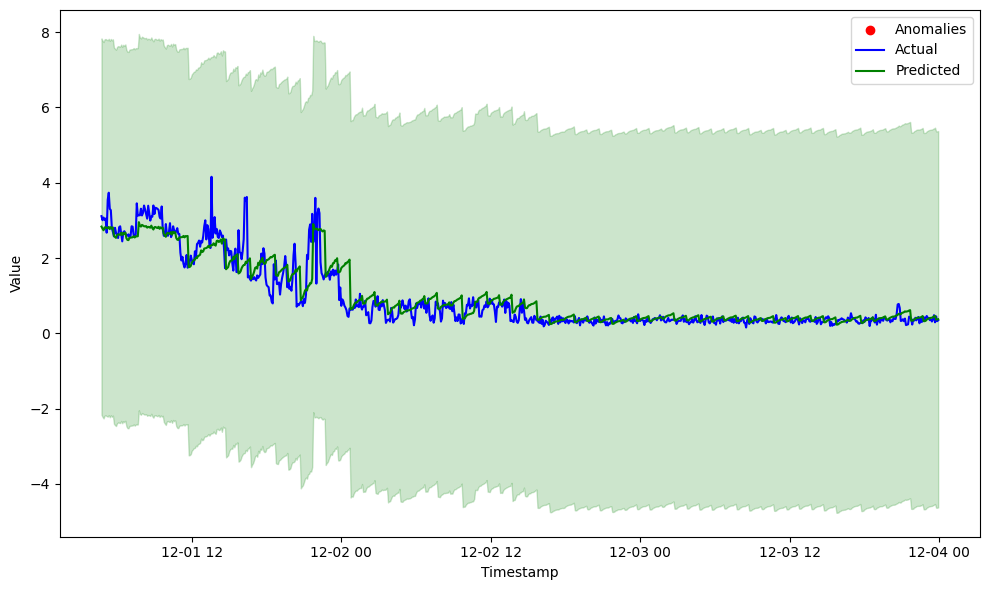

In [17]:
lstm.plotter.plot_anomalies(anomaly_df, 5.0)

In [18]:
anomaly_df_2 = lstm.flag_anomalies_adaptive(
    eval_df["actual"],
    eval_df["predicted"],
    2.0,
    12,
)

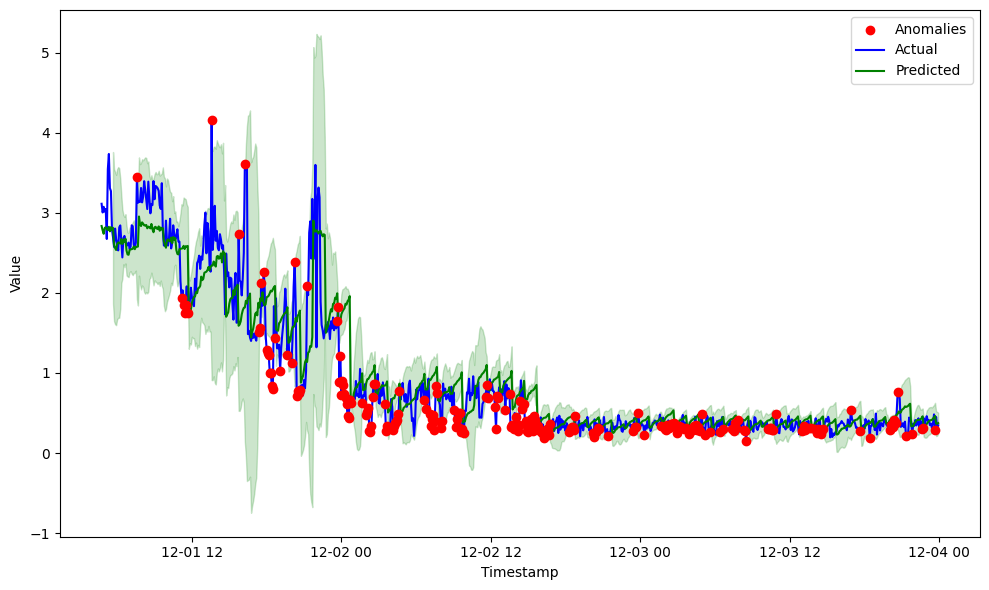

In [19]:
lstm.plotter.plot_anomalies_adaptive(anomaly_df_2)

In [20]:
anomaly_df_2.head(50)

,actual,predicted,diff,diff_mean,std_dev_diff,lower_anomaly_bound,upper_anomaly_bound,is_anomaly
2023-12-01 04:45:22,3.113010,2.835424,0.277586,NaN,NaN,NaN,NaN,0
2023-12-01 04:50:22,3.004385,2.780512,0.223873,NaN,NaN,NaN,NaN,0
2023-12-01 04:55:22,3.075376,2.737921,0.337455,NaN,NaN,NaN,NaN,0
2023-12-01 05:00:22,3.015011,2.811635,0.203375,NaN,NaN,NaN,NaN,0
2023-12-01 05:05:22,3.048212,2.819265,0.228947,NaN,NaN,NaN,NaN,0
2023-12-01 05:10:22,2.673476,2.798933,-0.125457,NaN,NaN,NaN,NaN,0
2023-12-01 05:15:22,3.545206,2.785832,0.759374,NaN,NaN,NaN,NaN,0
2023-12-01 05:20:22,3.735257,2.825394,0.909863,NaN,NaN,NaN,NaN,0
2023-12-01 05:25:22,3.307455,2.768261,0.539195,NaN,NaN,NaN,NaN,0
2023-12-01 05:30:22,3.271119,2.821248,0.449871,NaN,NaN,NaN,NaN,0
